In [6]:
from keras_segmentation.models.segnet import *
import numpy as np
from keras_segmentation.predict import predict_multiple, predict, evaluate
from keras_segmentation.models import all_models
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf

train_images =  "training_set/train_img/"
train_annotations = "training_set/train_ana/"
val_images="training_set/val_img/"
val_annotations="training_set/val_ana/"

In [2]:
model_name = ["vgg_segnet", "resnet50_segnet", "vgg_unet", "resnet50_unet", "vgg_pspnet", "resnet50_pspnet"]
cm = 0
m_version = '_1.1'

model = all_models.model_from_name[model_name[cm]](n_classes=7, input_height=1056, input_width=1440)
# model = all_models.model_from_name[model_name[cm]](n_classes=7, input_height=960, input_width=1344)   ###  This is for pspnet model size


if cm % 2 == 0:
    L_num = 15
    # L_num = 20      ###This is for pspnet model size
else:
    L_num = 141
    # L_num = 175     ###This is for pspnet model size

freeze = True
if freeze:
    m_version = m_version+"_frozen"
    for L in range(L_num):
        model.get_layer(index=L).trainable = False
model.summary(show_trainable=True)

print("Using "+model_name[cm]+m_version+" model")


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-27 23:40:25.741567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-27 23:40:25.741940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_3"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_1 (InputLayer)        [(None, 1056, 1440, 3)]   0         N          
                                                                            
 block1_conv1 (Conv2D)       (None, 1056, 1440, 64)    1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, 1056, 1440, 64)    36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, 528, 720, 64)      0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, 528, 720, 128)     73856     N          
                                                                            
 block2_conv2 (Conv2D)       (None, 528, 720, 128)     1475

Verifying training dataset


100%|██████████| 185/185 [00:07<00:00, 23.47it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 75/75 [00:03<00:00, 23.76it/s]


Dataset verified! 


2022-06-28 06:37:47.557770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.9783

2022-06-28 06:37:53.426379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: saving model to ./checkpoints/vgg_segnet_1.1_frozen/vgg_segnet.00001
2/2 [==============================] - 11s 8s/step - loss: 0.6892 - accuracy: 0.9783 - val_loss: 19.4967 - val_accuracy: 0.2347


0it [00:00, ?it/s]2022-06-28 06:37:58.859614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
75it [00:32,  2.32it/s]


{'frequency_weighted_IU': 0.21204005809772689, 'mean_IU': 0.03612183619241975, 'class_wise_IU': array([0.21780012, 0.03505274, 0.        , 0.        , 0.        ,
       0.        , 0.        ])}
Loading the weights from latest checkpoint  ./checkpoints/vgg_segnet_1.1_frozen/vgg_segnet.00001
Verifying training dataset


100%|██████████| 185/185 [00:07<00:00, 23.30it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 75/75 [00:03<00:00, 23.45it/s]


Dataset verified! 
Epoch 2/2


2022-06-28 06:38:43.883246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.9514

2022-06-28 06:38:49.102688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 2: saving model to ./checkpoints/vgg_segnet_1.1_frozen/vgg_segnet.00002
2/2 [==============================] - 11s 7s/step - loss: 0.6474 - accuracy: 0.9514 - val_loss: 20.5788 - val_accuracy: 0.1915


0it [00:00, ?it/s]2022-06-28 06:38:54.491484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
75it [00:32,  2.29it/s]


{'frequency_weighted_IU': 0.18740174914193647, 'mean_IU': 0.03413067864863314, 'class_wise_IU': array([1.92045072e-01, 4.67058998e-02, 1.07639139e-04, 5.61394669e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}


100%|██████████| 75/75 [00:34<00:00,  2.19it/s]


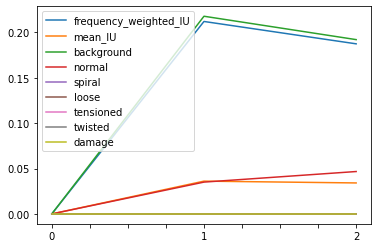

In [62]:
checkpoints_path = "./checkpoints/"+model_name[cm]+m_version+"/"+model_name[cm]
out_dir="output_dir/"+model_name[cm]+m_version

init_frames= {"frequency_weighted_IU":0, "mean_IU":0, 'background':0, 'normal':0, 'spiral':0, 'loose':0, 'tensioned':0, 'twisted':0, 'damage':0}
frames = pd.DataFrame(init_frames,
                            columns=["frequency_weighted_IU", "mean_IU", 'background', 'normal', 'spiral', 'loose', 'tensioned', 'twisted', 'damage'],
                            index = [0])


for epochs in range(1,3,1):


    model.train(
        train_images =  "training_set/train_img/",
        train_annotations = "training_set/train_ana/",
        validate=True,
        val_images="training_set/val_img/",
        val_annotations="training_set/val_ana/",
        auto_resume_checkpoint=True,
        checkpoints_path = checkpoints_path, 
        epochs=epochs,
        batch_size=2,
        steps_per_epoch=2,
        val_batch_size=2,
        val_steps_per_epoch=8,
        do_augment=True
    )

    ev = model.evaluate_segmentation(inp_images_dir=val_images, annotations_dir=val_annotations)
    assert ev['frequency_weighted_IU'] > 0.01
    print(ev)

    class_names=['background', 'normal', 'spiral', 'loose', 'tensioned', 'twisted', 'damage']
    ev_wiz_classes = {}
    # ev_wiz_classes['epoch'] = epochs
    ev_wiz_classes["frequency_weighted_IU"] = ev["frequency_weighted_IU"]
    ev_wiz_classes["mean_IU"] = ev["mean_IU"]
    i = 0
    for class_name in class_names:
        ev_wiz_classes[class_name] = ev["class_wise_IU"][i]
        i += 1
    
    frame = pd.DataFrame(ev_wiz_classes,
                            columns=["frequency_weighted_IU", "mean_IU", 'background', 'normal', 'spiral', 'loose', 'tensioned', 'twisted', 'damage'],
                            index = [str(epochs)])

    frames = [frames, frame]
    frames = pd.concat(frames)
    

more_lines = ['','','', "Model Name:", str(model_name[cm]+m_version),"checkpoints_path: ", checkpoints_path, "model IOU: ", str(ev)]
with open('models_evaluate.txt', 'a') as f:
    f.writelines('\n'.join(more_lines))
    
out_dir="output_dir/"+model_name[cm]+m_version
# checkpoints_path = './checkpoints/resnet50_segnet_1.0(unfrozen)/resnet50_segnet'

predict_multiple(
        model = model,
        inp_dir = val_images, 
        # checkpoints_path = checkpoints_path, 
        out_dir = out_dir+"/nomalSeg")


predict_multiple(
        model = model, 
        inp_dir=val_images, 
        out_dir=out_dir+"/overlay",
        # checkpoints_path=checkpoints_path, 
        overlay_img=True,
        class_names=['_background_', 'normal', 'spiral', 'loose', 'tensioned', 'twisted', 'damage'], 
        show_legends=True)



frames.to_csv(out_dir+"/"+model_name[cm]+m_version+'.csv')
frames.to_excel(out_dir+"/"+model_name[cm]+m_version+'.xlsx', sheet_name="Sheet1")

plot = frames.plot()
fig = plot.get_figure()
fig.savefig(out_dir+"/"+model_name[cm]+m_version+".png")
